In [ ]:
import fasttext
import pandas as pd
from sklearn.metrics import classification_report
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 767.7 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.5-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.5-py3-none-any.whl (240 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4246558 sha256=67ca7f9c62bbd719caa158487c755c9bec88c8355d311e68fc9254bd385a3c08
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
# Skipgram model :
model = fasttext.train_supervised(
    'clasificaciones.train.ext.txt',
    autotuneValidationFile='clasificaciones.valid.ext.txt',
)

ValueError: Validation file cannot be opened!

In [ ]:
def print_results(N, p, r):
    print("N\t" + str(N))
    print("Precision@{}\t{:.3f}".format(1, p))
    print("Recall@{}\t{:.3f}".format(1, r))

In [ ]:
print_results(*model.test('clasificaciones.train.ext.txt'))
print_results(*model.test('clasificaciones.valid.ext.txt'))
print_results(*model.test('clasificaciones.test.ext.txt'))

N	36252
Precision@1	0.879
Recall@1	0.879
N	4530
Precision@1	0.763
Recall@1	0.763
N	4532
Precision@1	0.769
Recall@1	0.769


In [ ]:
model.save_model("fasttext_ext.bin")

In [ ]:
text=pd.read_csv('clasificaciones.test.txt', header=None)
text.columns=['text']

In [ ]:
text[['label', 'variable']] = text['text'].str.split(n=1, expand=True)
text


,text,label,variable
0,__label__9018 l plano blando duro laboratorios...,__label__9018,l plano blando duro laboratorios adulto
1,__label__5005 restauracion compuesta posterior...,__label__5005,restauracion compuesta posterior 2 caras odont...
2,__label__3014 atm transcraneal acciones de rad...,__label__3014,atm transcraneal acciones de radiologia oral y...
3,__label__3001 bh13001 rx retroalveolar adulto,__label__3001,bh13001 rx retroalveolar adulto
4,__label__2001 higiene o profilaxis en ninos ac...,__label__2001,higiene o profilaxis en ninos acciones de prev...
...,...,...,...
4111,__label__12014 12008d 04 tratamiento de conten...,__label__12014,12008d 04 tratamiento de contencion por arcada...
4112,__label__20026 aditamento para implante labora...,__label__20026,aditamento para implante laboratorios adulto
4113,__label__12044 retiro de ortodoncia ambas arca...,__label__12044,retiro de ortodoncia ambas arcadas colina 2023...
4114,__label__13018 9904007 ionomero simple operato...,__label__13018,9904007 ionomero simple operatoria nino


In [ ]:
text = text.drop('text', axis=1)


In [ ]:
text

,label,variable
0,__label__9018,l plano blando duro laboratorios adulto
1,__label__5005,restauracion compuesta posterior 2 caras odont...
2,__label__3014,atm transcraneal acciones de radiologia oral y...
3,__label__3001,bh13001 rx retroalveolar adulto
4,__label__2001,higiene o profilaxis en ninos acciones de prev...
...,...,...
4111,__label__12014,12008d 04 tratamiento de contencion por arcada...
4112,__label__20026,aditamento para implante laboratorios adulto
4113,__label__12044,retiro de ortodoncia ambas arcadas colina 2023...
4114,__label__13018,9904007 ionomero simple operatoria nino


In [ ]:
etiquetas, probabilidades = model.predict(text['variable'].iloc[0], k=4)


In [ ]:
etiquetas

('__label__18021', '__label__18020', '__label__16031', '__label__16030')

In [ ]:
valores_umbral = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
resultados = []

for umbral in valores_umbral:
    lista_predicciones = []
    lista_reales=[]
    contador_total=0
    for i in range(len(text['variable'])):
        etiquetas, probabilidades = model.predict(text['variable'].iloc[i], k=4)
        indice_maximo = np.argmax(probabilidades)
        valor_max=probabilidades[indice_maximo]
        if umbral < 0.9:
            if ((valor_max >= umbral) and (valor_max < umbral + 0.1)):
                contador_total=contador_total+1
                lista_predicciones.append(etiquetas[indice_maximo])
                lista_reales.append(text['label'].iloc[i])
        if umbral == 0.9:
            if ((valor_max >= umbral) and (valor_max < umbral + 0.5)):
                contador_total=contador_total+1
                lista_predicciones.append(etiquetas[indice_maximo])
                lista_reales.append(text['label'].iloc[i])

    report = classification_report(lista_reales, lista_predicciones, output_dict=True)
    precision_weighted_avg = report['weighted avg']['precision']
    accuracy=report['accuracy']
    resultados.append((umbral, precision_weighted_avg, contador_total/len(text['variable']), accuracy))

# Imprimir los resultados
for umbral, precision_weighted_avg, contador_total, accuracy in resultados:
    print(f"Umbral: {umbral}, Precision Weighted Avg: {precision_weighted_avg}, Muestra abarcada: {contador_total}, Accuracy: {accuracy}")

c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\

Umbral: 0.0, Precision Weighted Avg: 0.18181818181818182, Muestra abarcada: 0.0024271844660194173, Accuracy: 0.18181818181818182
Umbral: 0.1, Precision Weighted Avg: 0.3469387755102041, Muestra abarcada: 0.010812003530450132, Accuracy: 0.2857142857142857
Umbral: 0.2, Precision Weighted Avg: 0.23469387755102042, Muestra abarcada: 0.021624007060900265, Accuracy: 0.23469387755102042
Umbral: 0.3, Precision Weighted Avg: 0.2947318007662835, Muestra abarcada: 0.038393645189761696, Accuracy: 0.3045977011494253
Umbral: 0.4, Precision Weighted Avg: 0.39701999245567715, Muestra abarcada: 0.05317740511915269, Accuracy: 0.3651452282157676
Umbral: 0.5, Precision Weighted Avg: 0.5216895644548378, Muestra abarcada: 0.06862312444836717, Accuracy: 0.4919614147909968
Umbral: 0.6, Precision Weighted Avg: 0.6542976939203354, Muestra abarcada: 0.07016769638128861, Accuracy: 0.6132075471698113
Umbral: 0.7, Precision Weighted Avg: 0.7387063299896229, Muestra abarcada: 0.0911297440423654, Accuracy: 0.69249394

c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\enaga\miniconda3\lib\site-packages\sklearn\metrics\

In [ ]:
valores_umbral = [0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
resultados = []

for umbral in valores_umbral:
    contador_total=0
    contador_buenas=0
    for i in range(len(text['variable'])):
        etiquetas, probabilidades = model.predict(text['variable'].iloc[i], k=4)
        indice_maximo = np.argmax(probabilidades)
        valor_max=probabilidades[indice_maximo]
        if umbral < 0.9:
            if ((valor_max >= umbral) and (valor_max < umbral + 0.1)):
                contador_total=contador_total+1
                if text['label'].iloc[i] in etiquetas:
                    contador_buenas=contador_buenas+1

    resultados.append((umbral, contador_buenas/contador_total ))

# Imprimir los resultados
for umbral, aciertos in resultados:
    print(f"Umbral: {umbral}, Porcentaje de acierto: {aciertos}")

Umbral: 0.0, Porcentaje de acierto: 0.8181818181818182
Umbral: 0.1, Porcentaje de acierto: 0.5510204081632653
Umbral: 0.2, Porcentaje de acierto: 0.5918367346938775
Umbral: 0.3, Porcentaje de acierto: 0.7298850574712644
Umbral: 0.4, Porcentaje de acierto: 0.8423236514522822
Umbral: 0.5, Porcentaje de acierto: 0.9292604501607717
Umbral: 0.6, Porcentaje de acierto: 0.9371069182389937
Umbral: 0.7, Porcentaje de acierto: 0.9539951573849879


In [ ]:
umbrales = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

precision_weighted_avg = [0.18181818181818182, 0.3469387755102041, 0.23469387755102042, 0.2947318007662835, 0.39701999245567715, 0.5216895644548378, 0.6542976939203354, 0.7387063299896229, 0.8118944633552313, 0.9506005399860061]

muestra_abarcada = [0.0024271844660194173, 0.010812003530450132, 0.021624007060900265, 0.038393645189761696, 0.05317740511915269, 0.06862312444836717, 0.07016769638128861, 0.0911297440423654, 0.13217122683142102, 0.5114739629302736]

accuracy = [0.18181818181818182, 0.2857142857142857, 0.23469387755102042, 0.3045977011494253, 0.3651452282157676, 0.4919614147909968, 0.6132075471698113, 0.6924939467312349, 0.8046744574290484, 0.951251078515962]


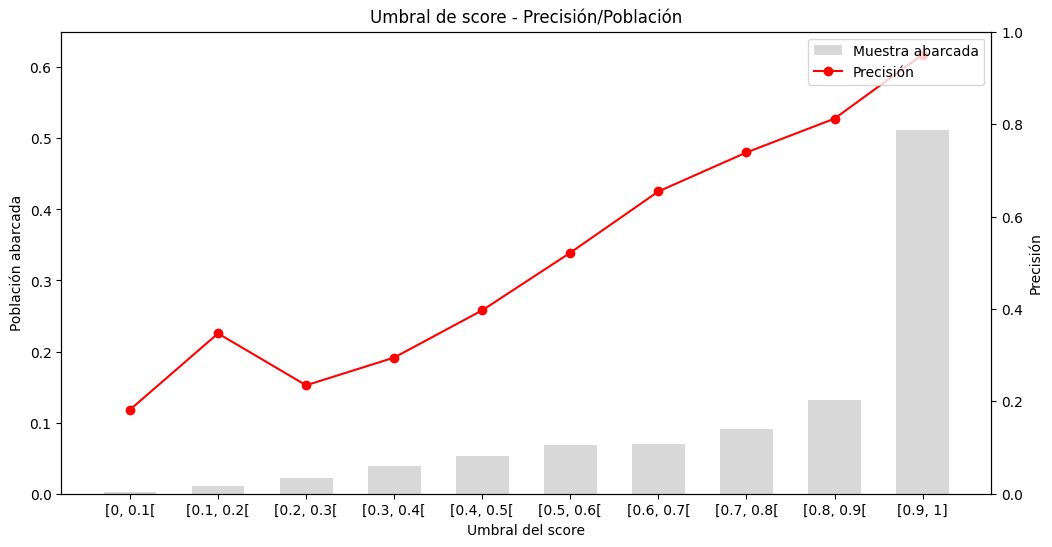

In [ ]:
import matplotlib.pyplot as plt

# Crear el gráfico
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotear en el eje primario
ax1.bar(umbrales, muestra_abarcada, width=0.06, color='gray', alpha=0.3, label='Muestra abarcada')
ax1.set_xlabel('Umbral del score')
ax1.set_ylabel('Población abarcada', color='black')
ax1.tick_params('y', colors='black')

# Configurar el eje x para mostrar todos los valores
# Establecer las etiquetas del eje x manualmente
etiquetas_umbral = ['[0, 0.1[', '[0.1, 0.2[', '[0.2, 0.3[', '[0.3, 0.4[', '[0.4, 0.5[', '[0.5, 0.6[', '[0.6, 0.7[', '[0.7, 0.8[', '[0.8, 0.9[', '[0.9, 1]']
plt.xticks(umbrales, etiquetas_umbral)


# Crear el eje secundario
ax2 = ax1.twinx()
ax2.plot(umbrales, precision_weighted_avg, color='red', marker='o', label='Precisión')

ax2.set_ylabel('Precisión', color='black')
ax2.tick_params('y', colors='black')

# Fijar los valores máximos y mínimos en el eje y para ambos ejes
ax1.set_ylim(0, 0.65)  # Fija los valores de Y para el primer eje
ax2.set_ylim(0, 1)   # Fija los valores de Y para el segundo eje

# Agregar una leyenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# Mostrar el gráfico
plt.title('Umbral de score - Precisión/Población')
plt.show()


Cuando el modelo con preTrainedVectors no funciona desde Python se puede invoca desde linea de comando con los siguientes comandos (requiere tener instalado el binario de fasttext)

```bash
!fasttext supervised \
    -input clasificaciones.train.txt \
    -output clasificaciones.model \
    -dim 100 \
    -pretrainedVectors vector_model.vec \
    -autotune-validation clasificaciones.valid.txt
```

```bash
!fasttext test clasificaciones.model.bin clasificaciones.train.txt
!fasttext test clasificaciones.model.bin clasificaciones.valid.txt
!fasttext test clasificaciones.model.bin clasificaciones.test.txt
```

In [ ]:
model = fasttext.train_supervised(
    'clasificaciones.train.txt',
    # epoch=10,
    dim=100,
    autotuneValidationFile='clasificaciones.valid.txt',
    pretrainedVectors='vector_model.vec',
)

Progress: 100.0% Trials:   18 Best score:  0.648900 ETA:   0h 0m 0s
Training again with best arguments
Read 0M words
Number of words:  16289
Number of labels: 562
Progress: 100.0% words/sec/thread:   60459 lr:  0.000000 avg.loss:  1.617301 ETA:   0h 0m 0s


In [ ]:
print_results(*model.test('clasificaciones.train.txt'))
print_results(*model.test('clasificaciones.valid.txt'))
print_results(*model.test('clasificaciones.test.txt'))

N	76748
Precision@1	0.711
Recall@1	0.711
N	9587
Precision@1	0.649
Recall@1	0.649
N	9590
Precision@1	0.659
Recall@1	0.659
